# 1. 필요한 라이브러리 import

In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit

# 2. 데이터 불러오기

In [ ]:
df = pd.read_csv('./train.csv')

* Survived : 0 = 사망, 1 = 생존
* Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
* Sex : male = 남성, female = 여성
* Age : 나이
* SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
* Parch : 타이타닉 호에 동승한 부모 / 자식의 수
* Ticket : 티켓 번호
* Fare : 승객 요금
* Cabin : 방 호수
* Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

# 3. 데이터 확인하기

### 3-1. 데이터 전체적으로 살펴보기

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb1ec0e0d0>,
      dtype=object)

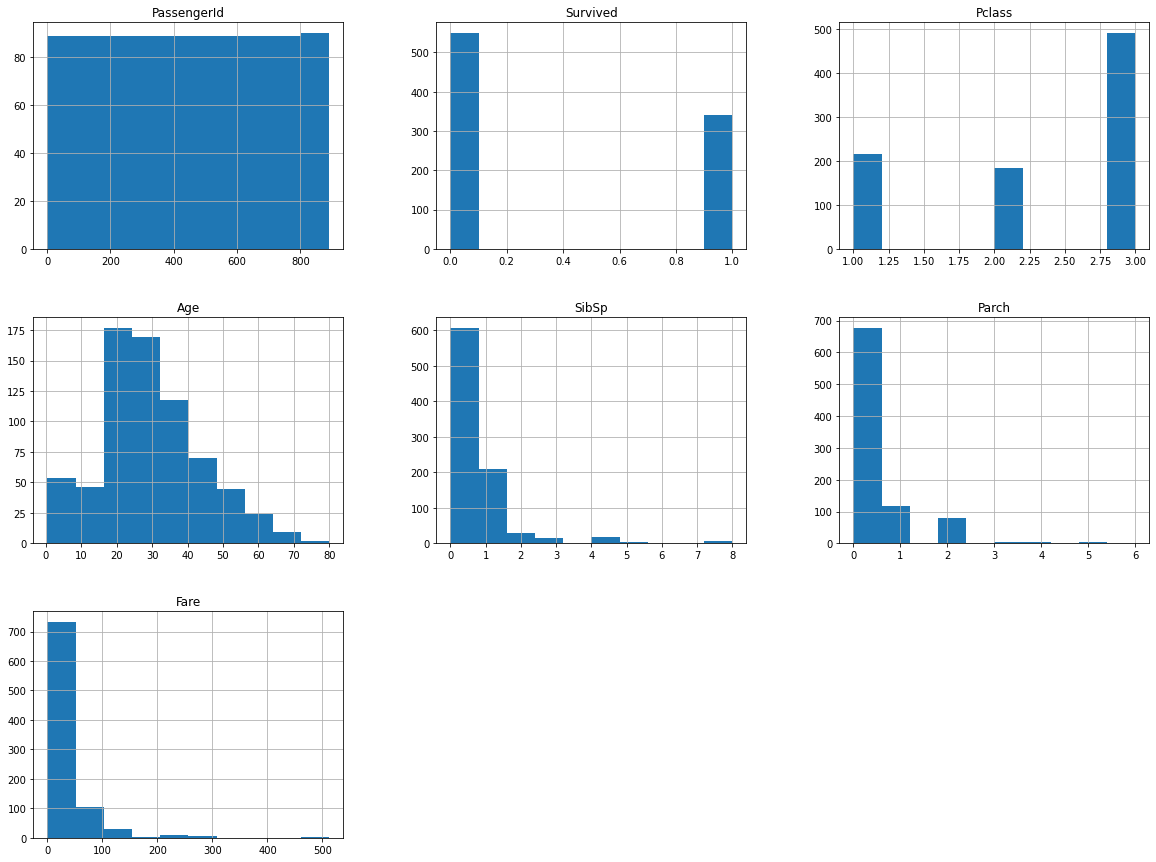

In [ ]:
df.hist(figsize=(20,15))
# PassengerId는 사람별 number이므로 무시

### 3-2. 그래프로 변수 특성 확인하기

0    549
1    342
Name: Survived, dtype: int64


([<matplotlib.axis.XTick at 0x7ffb1e765ad0>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

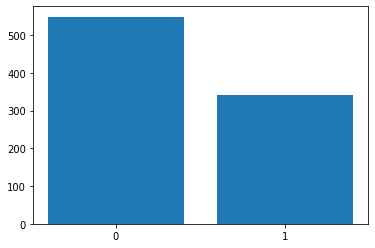

In [ ]:
print(df['Survived'].value_counts()) # 0 = 사망, 1 = 생존

value_counts = df['Survived'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

In [ ]:
corr_matrix = df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Text(0, 0.5, 'Count')

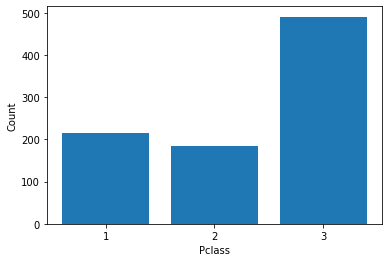

In [ ]:
# 'Survived'와 상관관계가 가장 높은 'Pclass' 에 대해 시각화
value_counts = df['Pclass'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.xlabel('Pclass')
plt.ylabel('Count')

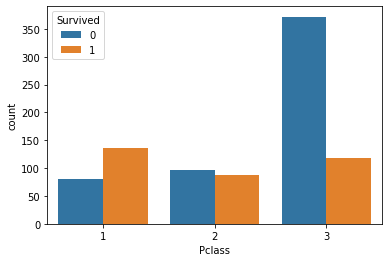

In [ ]:
# 연속형 변수가 아니여서 상관관계 그래프가 아닌 count 그래프로 나타냄
# Pclass 마다 'Survived'를 count
sns.countplot(data=df, x="Pclass", hue="Survived")

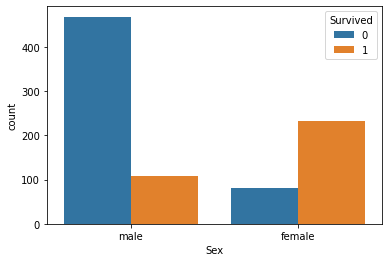

In [ ]:
# 성별에 따른 생존 countplot
sns.countplot(data=df, x="Sex", hue="Survived")

# 4. 처리할 데이터 확인 및 전처리

### 4-1. 결측값 처리

In [ ]:
# 결측값 확인해보기
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* 결측값이 존재 컬럼: 'Age', 'Cabin', 'Embarked'
  - 'Age'에서는 중간값으로 대체
  - 'Cabin'에서는 컬럼 자체를 제거(결측치가 굉장히 많음)
  - 'Embarked'에서는 결측치를 가진 행 제거(결측치 2개)

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df.drop('Cabin', axis=1, inplace=True) # inplace : 해당 열을 삭제한 데이터프레임으로 df 대체

In [ ]:
 # 위에서 모든 결측치를 처리한 후이므로 Embarked의 결측치에 해당하는 열을 한번에 지움
 df = df.dropna()

In [ ]:
# 결측치가 잘 처리되었는지 확인
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 4-2. 계층적 샘플링을 위한 'Age' 컬럼 카테고리 처리

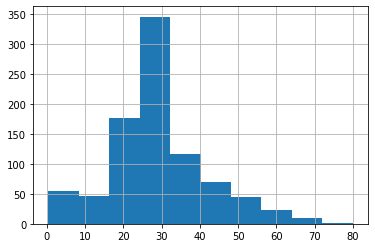

In [ ]:
# 데이터 살펴보기
df['Age'].hist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


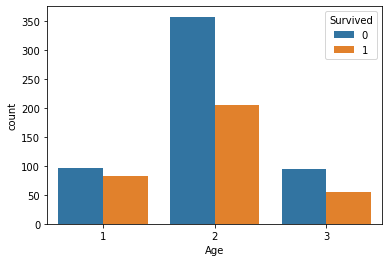

In [ ]:
df['Age'] = pd.cut(df['Age'],
                      bins=[0, 20, 40, np.inf],
                      labels=[1, 2, 3])

sns.countplot(data=df, x='Age', hue='Survived')

## 4-3. 'Name' 컬럼 전처리
* Mr, Mrs, Miss 등 성별, 결혼 유무를 알 수 있는 title을 추출해서 새로운 컬럼을 만들자

In [ ]:
df['Name']
# Mr, Mrs, Miss 같은 title은 ','과 '.' 사이에 문자열로 존재함을 이용해보자

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 889, dtype: object

In [ ]:
title_list = []
for name in df['Name']:
  # ','을 기준으로 split 하고 오른쪽 문자열 가져오기
  # -> 위의 문자열에서 '.'을 기준으로 split하고 왼쪽 문자열 가져오기
  # -> 가져오는 과정에서 공백이 생겼을 수도 있으므로 공백 제거
  title_list.append(name.split(',')[1].split('.')[0].strip())
df['Title'] = pd.DataFrame(title_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# 잘 처리 되었는지 확인
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2,0,0,211536,13.0000,S,Miss
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,30.0000,S,Mr
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,2,1,2,W./C. 6607,23.4500,S,Mr
889,890,1,1,"Behr, Mr. Karl Howell",male,2,0,0,111369,30.0000,C,NaN


In [ ]:
# 원인을 알 수는 없지만.. 마지막 2개의 데이터에서 처리가 안 되어서 손수 입력해줌
df['Title'][889] = 'Mr'
df['Title'][890] = 'Mr'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['Title'].value_counts()

Mr              518
Miss            181
Mrs             124
Master           39
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
# 'Mr'과 'Miss', 'Mrs'를 전처리
df['Title'][df['Title'] == 'Mr'] = 0
df['Title'][df['Title'] == 'Miss'] = 1
df['Title'][df['Title'] == 'Mrs'] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing im

In [ ]:
# 잘 처리되었는지 확인
df['Title'].value_counts()

0               518
1               181
2               124
Master           39
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
# 좀전에 전처리한 데이터를 제외하고 other 데이터를 3으로 전처리
df['Title'][(df['Title'] != 0) & (df['Title'] != 1) & (df['Title'] != 2)] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 잘 처리되었는지 확인
df['Title'].value_counts()

0    518
1    181
2    124
3     66
Name: Title, dtype: int64

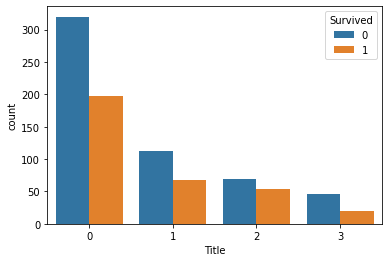

In [ ]:
sns.countplot(data=df, x='Title', hue='Survived')

## 4-4. 상관관계 조사

In [ ]:
# 'Survived'와 상관관계 조사
# 숫자형 컬럼들만 가져와서 상관관계 조사
corr_matrix = df.corr()

# target 변수로 사용할 'Survived' 컬럼과의 상관관계
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.255290
Parch          0.083151
PassengerId   -0.005028
SibSp         -0.034040
Pclass        -0.335549
Name: Survived, dtype: float64

In [ ]:
# 'Survived'와 상관관계가 높은 숫자형 변수와 범주형 변수를 추출함
features = ['Fare', 'Pclass','Age', 'Sex', 'Embarked', 'Title']
target = ['Survived']

train/test 데이터셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.2, random_state=2
)

## 4-5. 범주형 변수 처리 및 스케일링
* 아래 내용을 ColumnTransformer를 이용하여 수행
1. 범주형 변수 처리
 * 범주형 변수 : 'Sex', 'Embarked', 'Age', 'Title'
 * 'Ticket'컬럼은 target 변수와 상관관계가 낮다고 판단하여 따로 처리X
 * 원 핫 인코딩 방식 사용
2. 스케일링
 * 수치형 변수 : 'Fare', 'Pclass'
 * 3-1에서 Fare의 스케일이 다른 변수들보다 큼을 확인했음.
 * MinMaxScaler를 사용 할 경우 일부 max값에 치우칠 수 있음
 * 그러므로 0~1 사이로 스케일링 해주는 StandardScaler를 사용함
3. 계층적 샘플링
  * 카테고리 변수 : 'Age'
  * 편향 방지를 위해 처리

In [ ]:
obj_features = ['Sex', 'Embarked', 'Age', 'Title']
num_features = ['Fare', 'Pclass']
cat_features = ['Age']


ct = ColumnTransformer([
    ('encoding', OneHotEncoder(), obj_features),
    ('scaling', StandardScaler(), num_features),
    ('Sampling', StratifiedShuffleSplit(n_splits=1, random_state=2))
])

x_train = ct.fit_transform(x_train)
x_test = ct.fit_transform(x_test)

ValueError: ignored

# 5. 모델 학습 및 예측

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model = SGDClassifier()
y_pred = model.fit(x_train, y_train).predict(x_test)

# 6. 성능분석

## 6-1. k-겹 교차 검증

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
# array([0.8041958 , 0.73239437, 0.67605634, 0.76056338, 0.8028169 ])

## 6-2. 오차행렬(confusion matrix)

예측값 만들기
- 테스트 세트는 사용금지(데이터 스누핑 방지)
- cross_val_predict() 함수 사용
  - cross_val_score()함수처럼 k겹 교차 검증을 수행
  - 평가 점수 대신 각 테스트 폴드에서 얻은 예측을 반환
  - 여기서 얻은 예측 결과를 가지고 오차행렬을 만들자

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model, x_train, y_train, cv=5)

In [ ]:
from sklearn.metrics import confusion_matrix

### 여기서는 정밀도과 재현율 중 어느 것이 더 중요?
* 본 데이터에는 0(사망), 1(생존)을 예측하는 주제
* 특히 정밀도(Precision)에서 False Positive(생존했는데 사망했다고 예측)가 많은 것을 허용할 수 없다.
* 즉 정밀도가 높아야 하기 때문에 더 중요하다.

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
cm

### 정밀도(Precision)
* 정밀도는 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율
* 모델의 순수한 예측력 자체를 초점을 둔 지표
* 그렇기 때문에 무조건 양성으로 판단하면 좋은 정밀도를 얻기 때문에 주의

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_train, y_train_pred)

### 재현율(Recall)
* 재현율은 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_train, y_train_pred)

### f1 score
* f1 score는 Precision과 Recall의 조화평균

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

### PR curve

In [ ]:
# 예측 결과가 아니라 결정함수를 반환받도록 지정해야 함
y_score = cross_val_predict(model, x_train, y_train.values.ravel(), cv=5, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_score)

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("recall", fontsize=16)
  plt.ylabel("precision", fontsize=16)
  plt.axis([0, 1, 0, 1])

plt.figure(figsize=(16,12))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC curve
* 거짓양성비율(False Positive rate, RPR)
  - (본래 음성 샘플에 대한)잘못된 양성 판정 비율
* 진짜양성비율(True Positive rate, TPR)
  * 올바른 양성 판정 비율
  * 재현율의 다른 이름
* 임계값을 점점 낮추면 positive prediction 비율 증가
  * FPR, TPR 모두 점점 증가
* 좋은 분류기라면 점선(랜덤분류기의 ROC곡선)으로부터 최대한 멀리 떨어져 있어야 함

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_score)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('FPR', fontsize=16)
  plt.ylabel('TPR', fontsize=16)

plt.figure(figsize=(16,12))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_score)
# 약 0.81의 score를 통해 완벽하지는 않지만 어느정도는 클래스를 잘 분류함을 알 수 있음